In [16]:
%pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/77/91f92b2fddbd14201bf36cd0c0e7279f1501a88e7a00ef11261c4b95bb7a/scikit_learn-1.4.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ed/6f/ba2b2f14391291dd47d17da78c3ee644fb3a2fd6bddde664381c1968eda9/scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 640.0 kB/s eta 0:00:01
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/ae/e2/4dea6313ef2b38442fccbbaf4017e50a6c3c8a50e8ee9b512783e5c90409/joblib-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b7785b6e3


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   --------------- ------------------------ 17.6/45.9 MB 586.1 kB/s eta 0:00:49
   --------------- ------------------------ 17.6/45.9 MB 584.6 kB/s eta 0:00:49
   --------------- ------------------------ 17.7/45.9 MB 585.6 kB/s eta 0:00:49
   --------------- ------------------------ 17.7/45.9 MB 586.7 kB/s eta 0:00:49
   --------------- ------------------------ 17.7/45.9 MB 586.6 kB/s eta 0:00:49
   --------------- ------------------------ 17.8/45.9 MB 586.6 kB/s eta 0:00:48
   --------------- ------------------------ 17.8/45.9 MB 586.1 kB/s eta 0:00:49
   --------------- ------------------------ 17.8/45.9 MB 585.6 kB/s eta 0:00:48
   --------------- ------------------------ 17.8/45.9 MB 585.6 kB/s eta 0:00:48
   --------------- ------------------------ 17.8/45.9 MB 588.2 kB/s eta 0:00:48
   --------------- ------------------------ 17.9/45.9 MB 585.6 kB/s eta 0:00:48
   --------------- ------------------------ 17.9/45.9 MB 584.6 kB/s eta 0:00:48
   --------------- --------------------

In [2]:
 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [7]:
import pandas as pd
column_names = ['genre', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']
df=pd.read_csv("SpotifyFeatures.csv", usecols=column_names)

In [8]:
df.head()

,genre,acousticness,danceability,energy,liveness,speechiness,valence
0,Movie,0.611,0.389,0.910,0.3460,0.0525,0.814
1,Movie,0.246,0.590,0.737,0.1510,0.0868,0.816
2,Movie,0.952,0.663,0.131,0.1030,0.0362,0.368
3,Movie,0.703,0.240,0.326,0.0985,0.0395,0.227
4,Movie,0.950,0.331,0.225,0.2020,0.0456,0.390


In [9]:
df.shape

(232725, 7)

In [10]:
frequencies = pd.DataFrame()
genres = list(set(df['genre']))
repetition = []
for genre in genres:
    repetition.append(len(df[df['genre'] == str(genre)]))
frequencies['Genres'] = genres
frequencies['Repetitions'] = repetition
display(frequencies)

,Genres,Repetitions
0,R&B,8992
1,Alternative,9263
2,Jazz,9441
3,Ska,8874
4,Soundtrack,9646
5,Indie,9543
6,Children’s Music,9353
7,Dance,8701
8,Hip-Hop,9295
9,Pop,9386


<Axes: xlabel='count', ylabel='genre'>

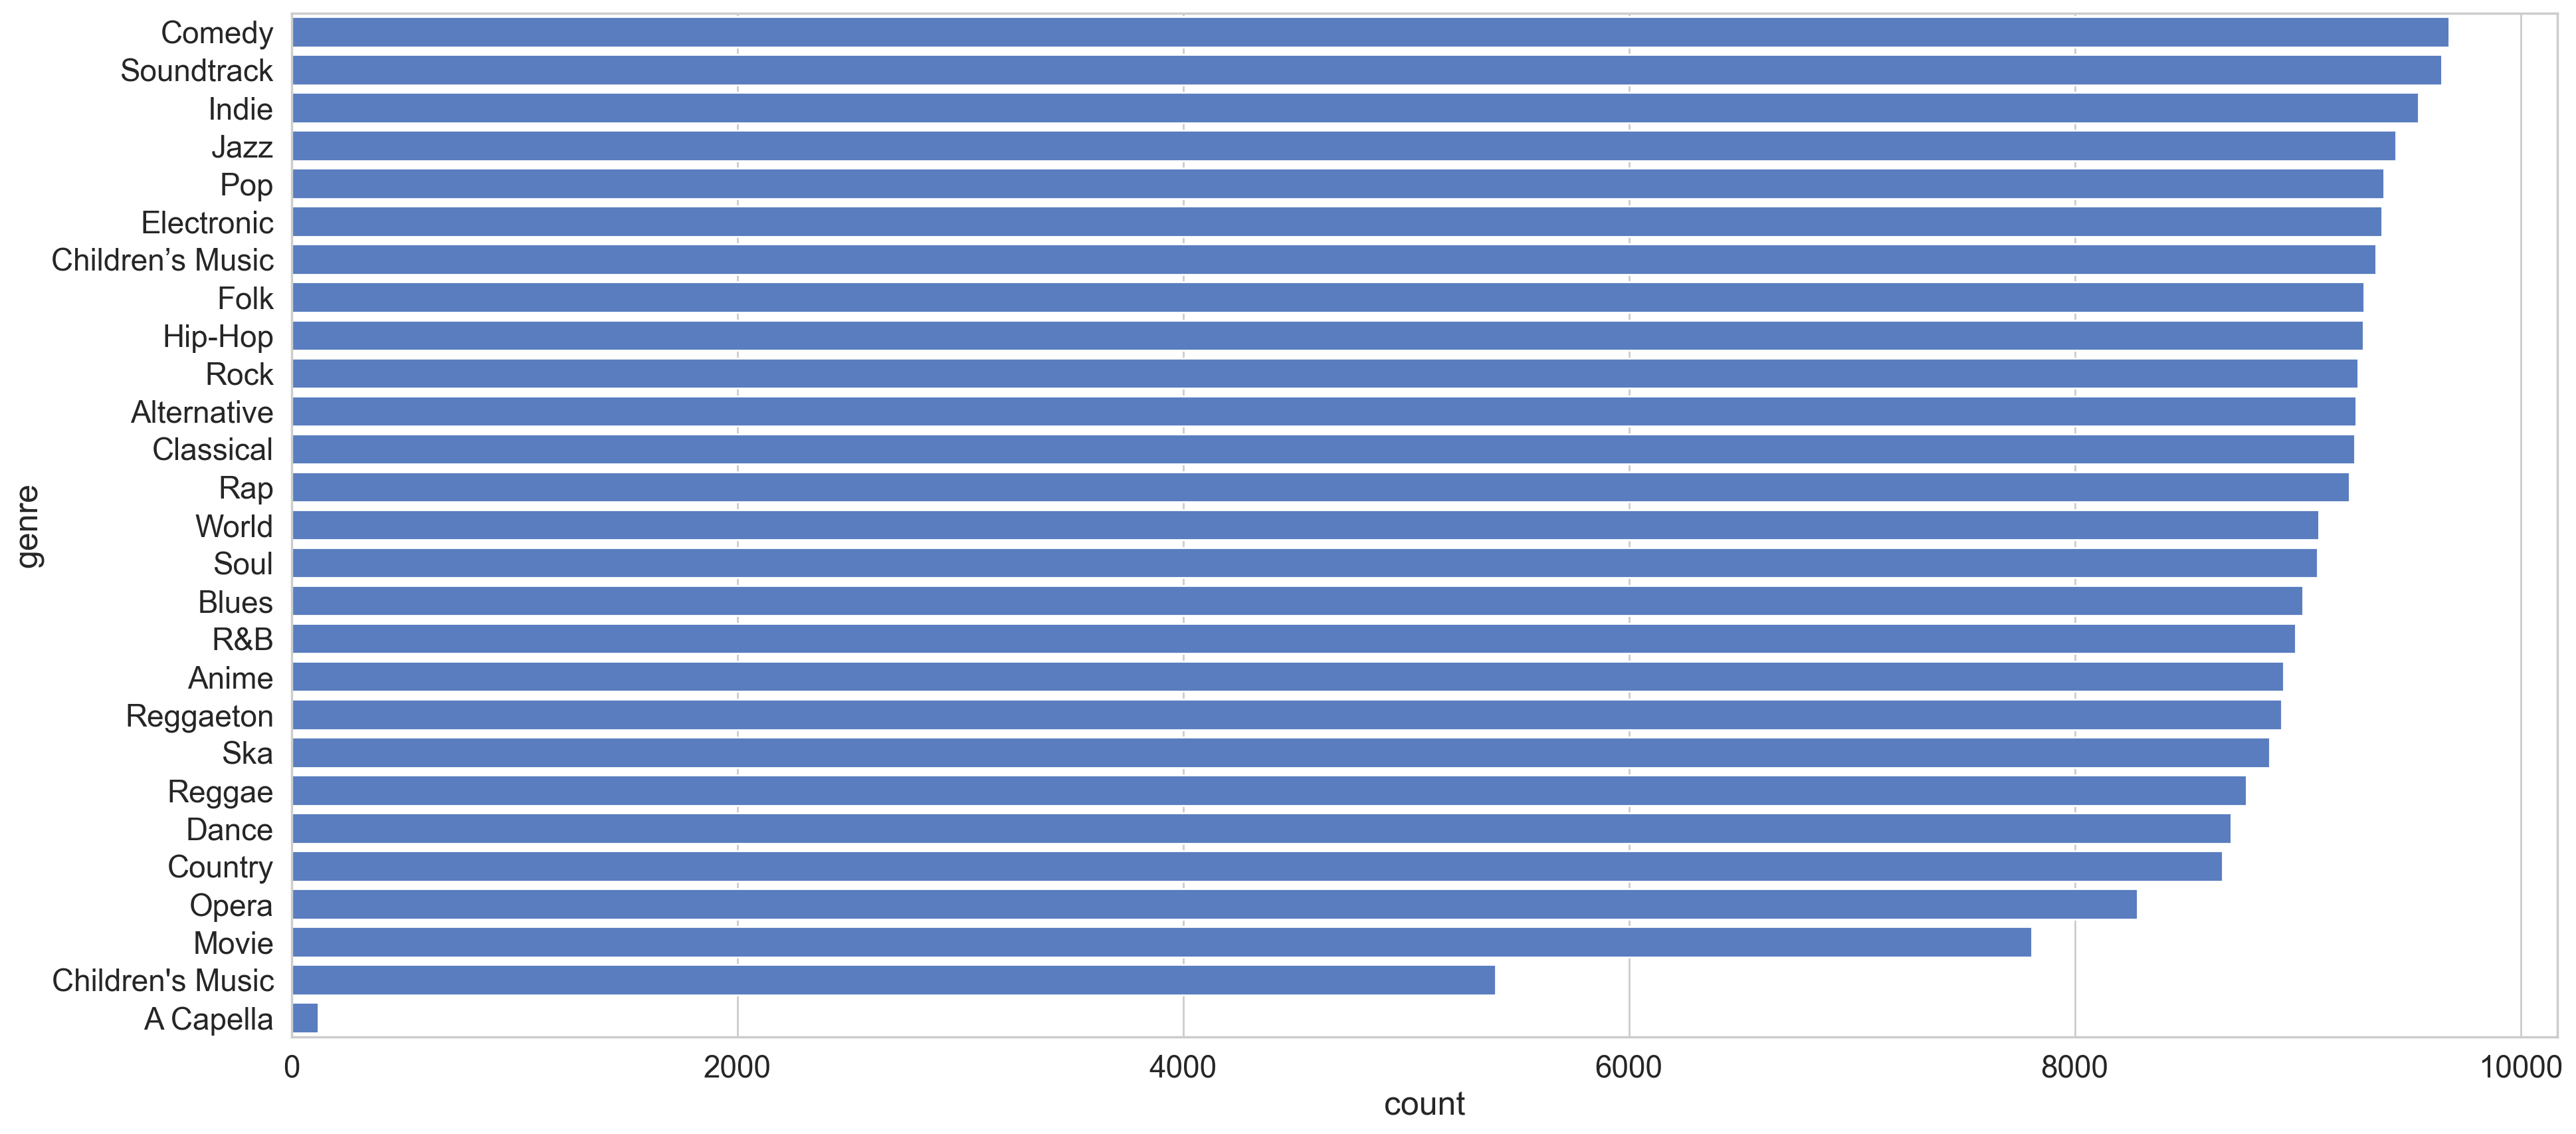

In [11]:
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)


In [12]:
genres = ['Classical','Reggaeton', 'Rock']
df = df[df.genre.isin(genres)]
display(df)

,genre,acousticness,danceability,energy,liveness,speechiness,valence
104022,Classical,0.9000,0.257,0.10900,0.0762,0.0597,0.3070
104023,Classical,0.9920,0.196,0.00687,0.1060,0.0442,0.0530
104024,Classical,0.9820,0.194,0.03240,0.0916,0.0382,0.0596
104025,Classical,0.9950,0.184,0.00527,0.1730,0.0432,0.1510
104026,Classical,0.9950,0.228,0.00385,0.0858,0.0449,0.1170
...,...,...,...,...,...,...,...
226503,Rock,0.6700,0.718,0.59300,0.1720,0.0377,0.8690
226504,Rock,0.0340,0.521,0.93300,0.3300,0.1790,0.6070
226505,Rock,0.6710,0.618,0.76900,0.2760,0.0309,0.6070
226506,Rock,0.0543,0.681,0.66200,0.2060,0.1150,0.8500


In [13]:
def plot_activity(gen, df):
    data = df[df['genre'] == gen][['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=gen)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

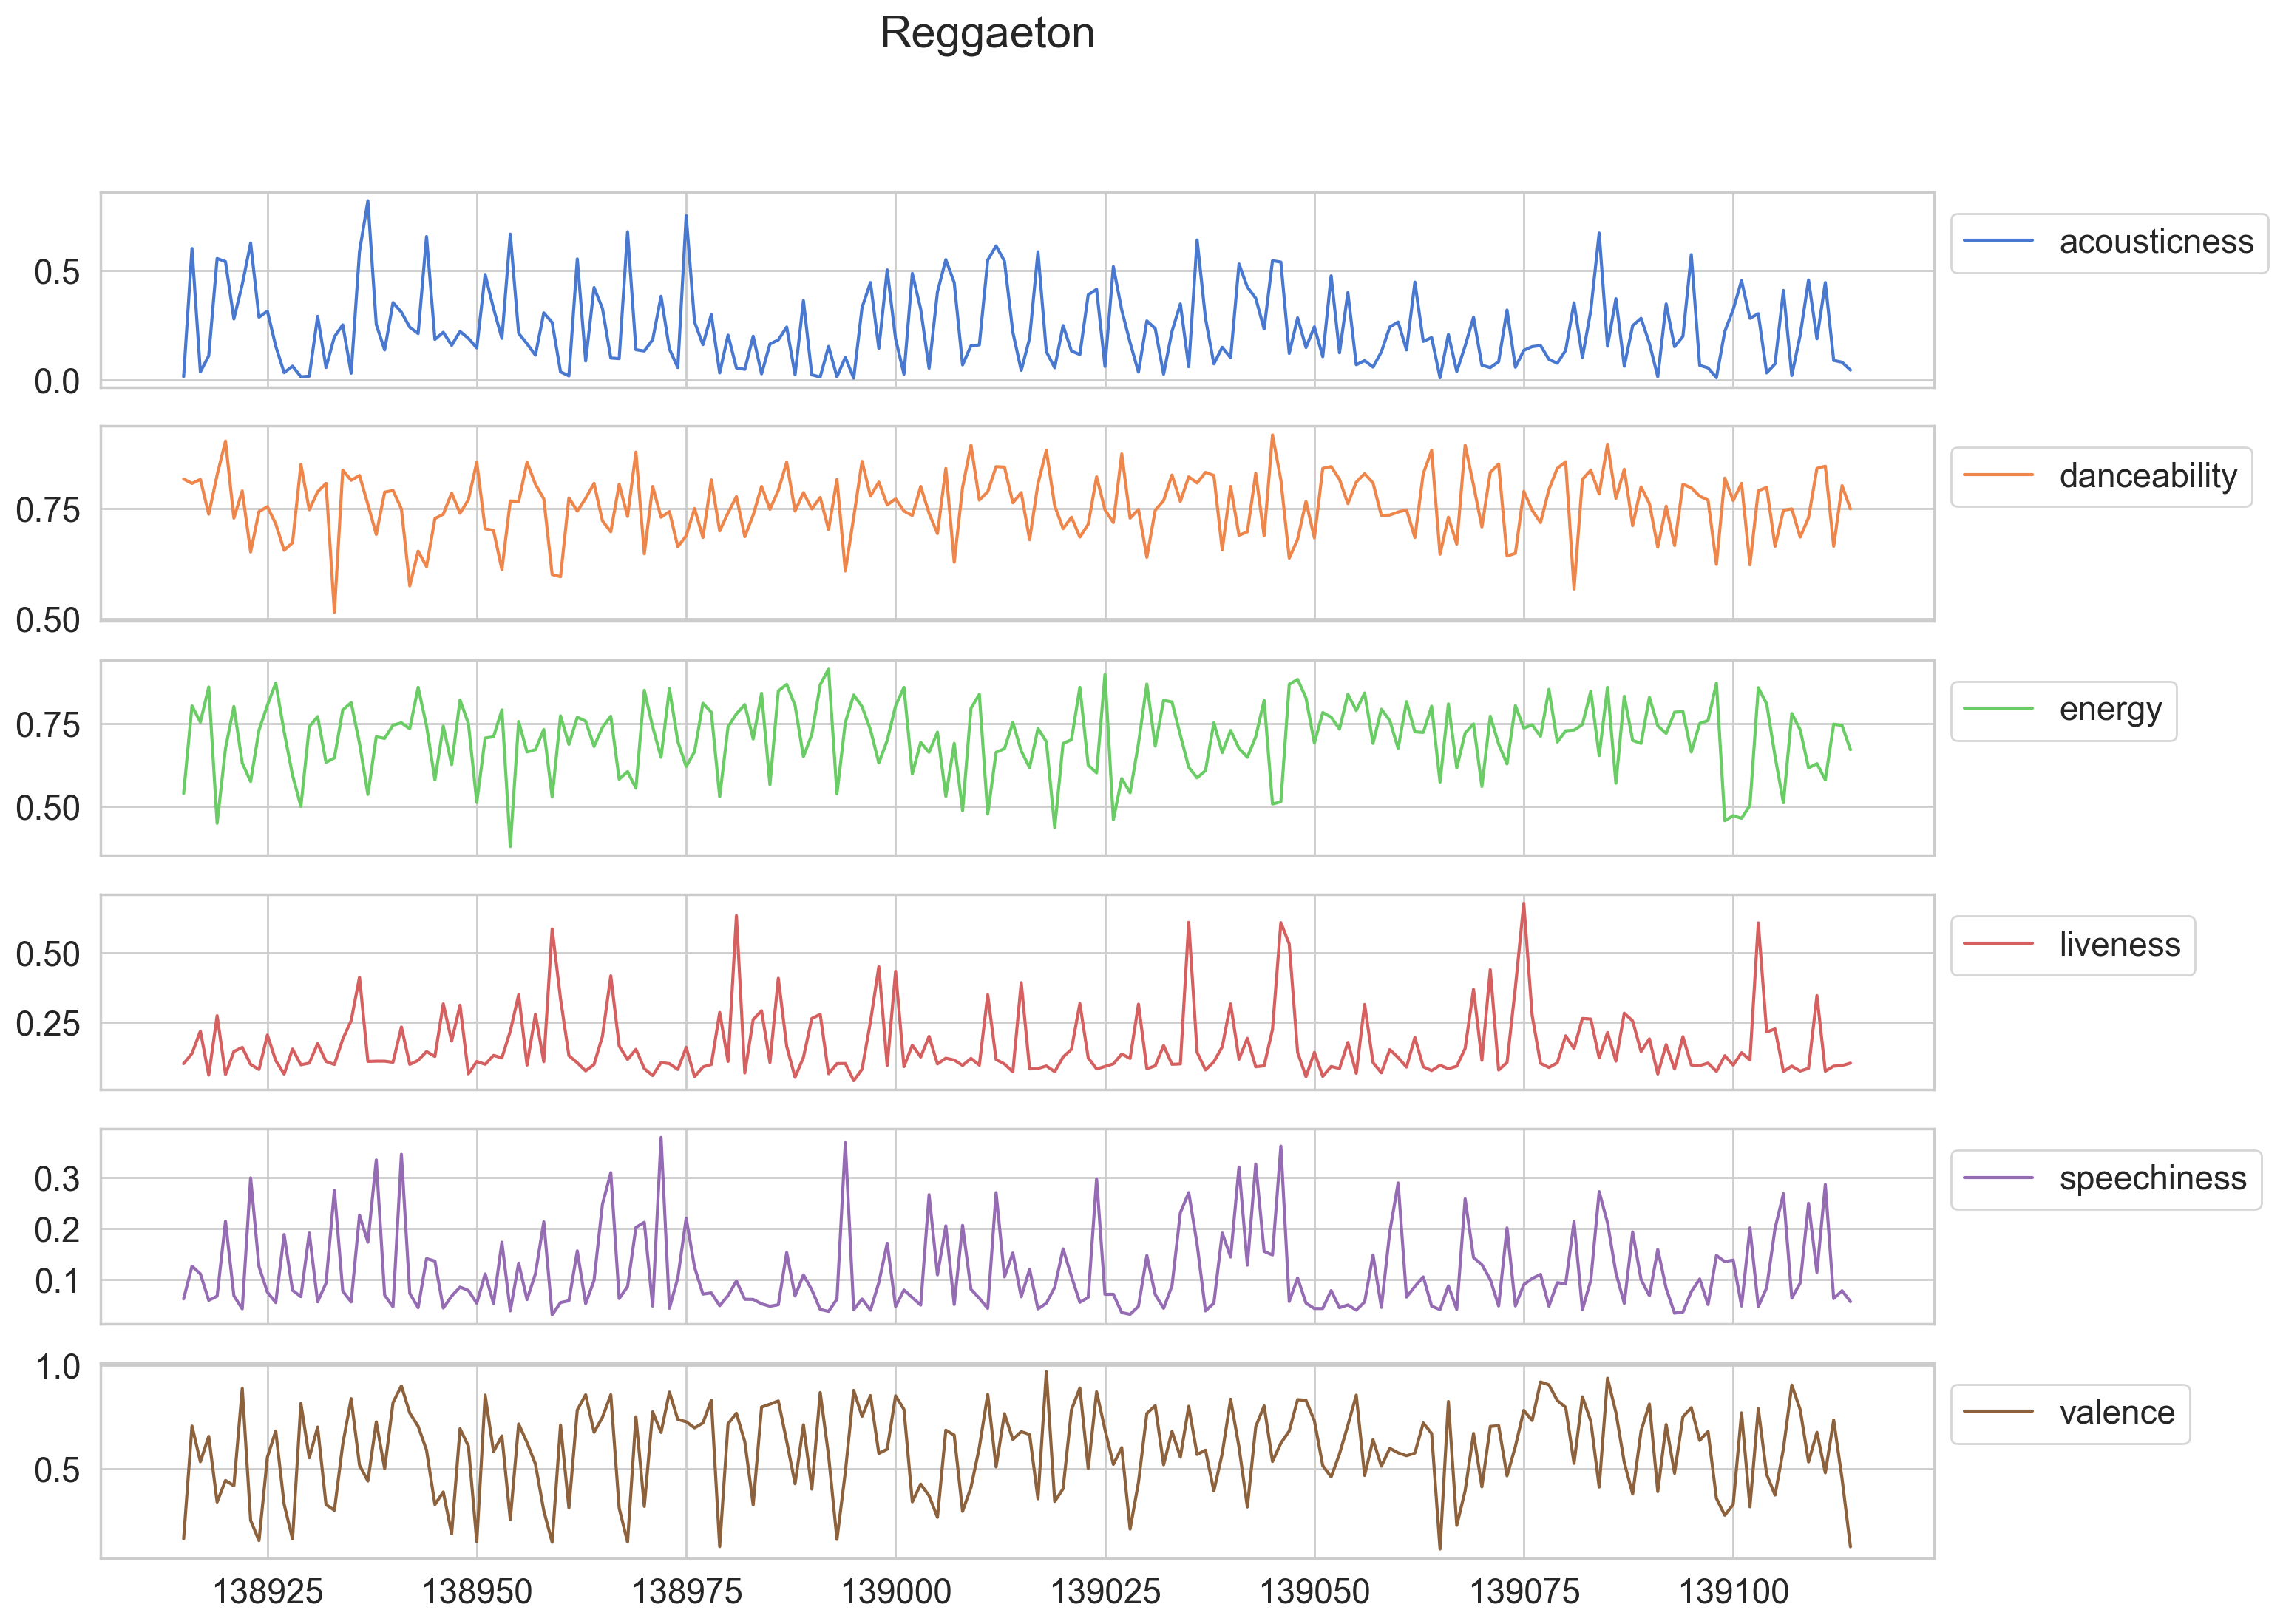

In [14]:
plot_activity('Reggaeton', df)

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.3, random_state=42)

train_features,train_labels = train[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']],train['genre']
test_features,test_labels = test[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']],test['genre']


In [18]:
train_labels.shape

(19218,)

In [19]:
test_features.shape

(8237, 6)

In [20]:
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [21]:
model = keras.Sequential()


model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(6,)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

c:\Users\Jadge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history = model.fit(
    train_features, train_labels_encoded,
    epochs=20,
    batch_size=50,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7332 - loss: 0.6184 - val_accuracy: 0.8671 - val_loss: 0.3503
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3454 - val_accuracy: 0.8678 - val_loss: 0.3334
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.3301 - val_accuracy: 0.8676 - val_loss: 0.3290
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8727 - loss: 0.3230 - val_accuracy: 0.8655 - val_loss: 0.3282
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8745 - loss: 0.3191 - val_accuracy: 0.8642 - val_loss: 0.3293
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8752 - loss: 0.3161 - val_accuracy: 0.8650 - val_loss: 0.3282
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8764 - loss: 0.3139 - val_accuracy: 0.8629 - val_loss: 0.3279
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8779 - loss: 0.3121 - val_accuracy: 0.

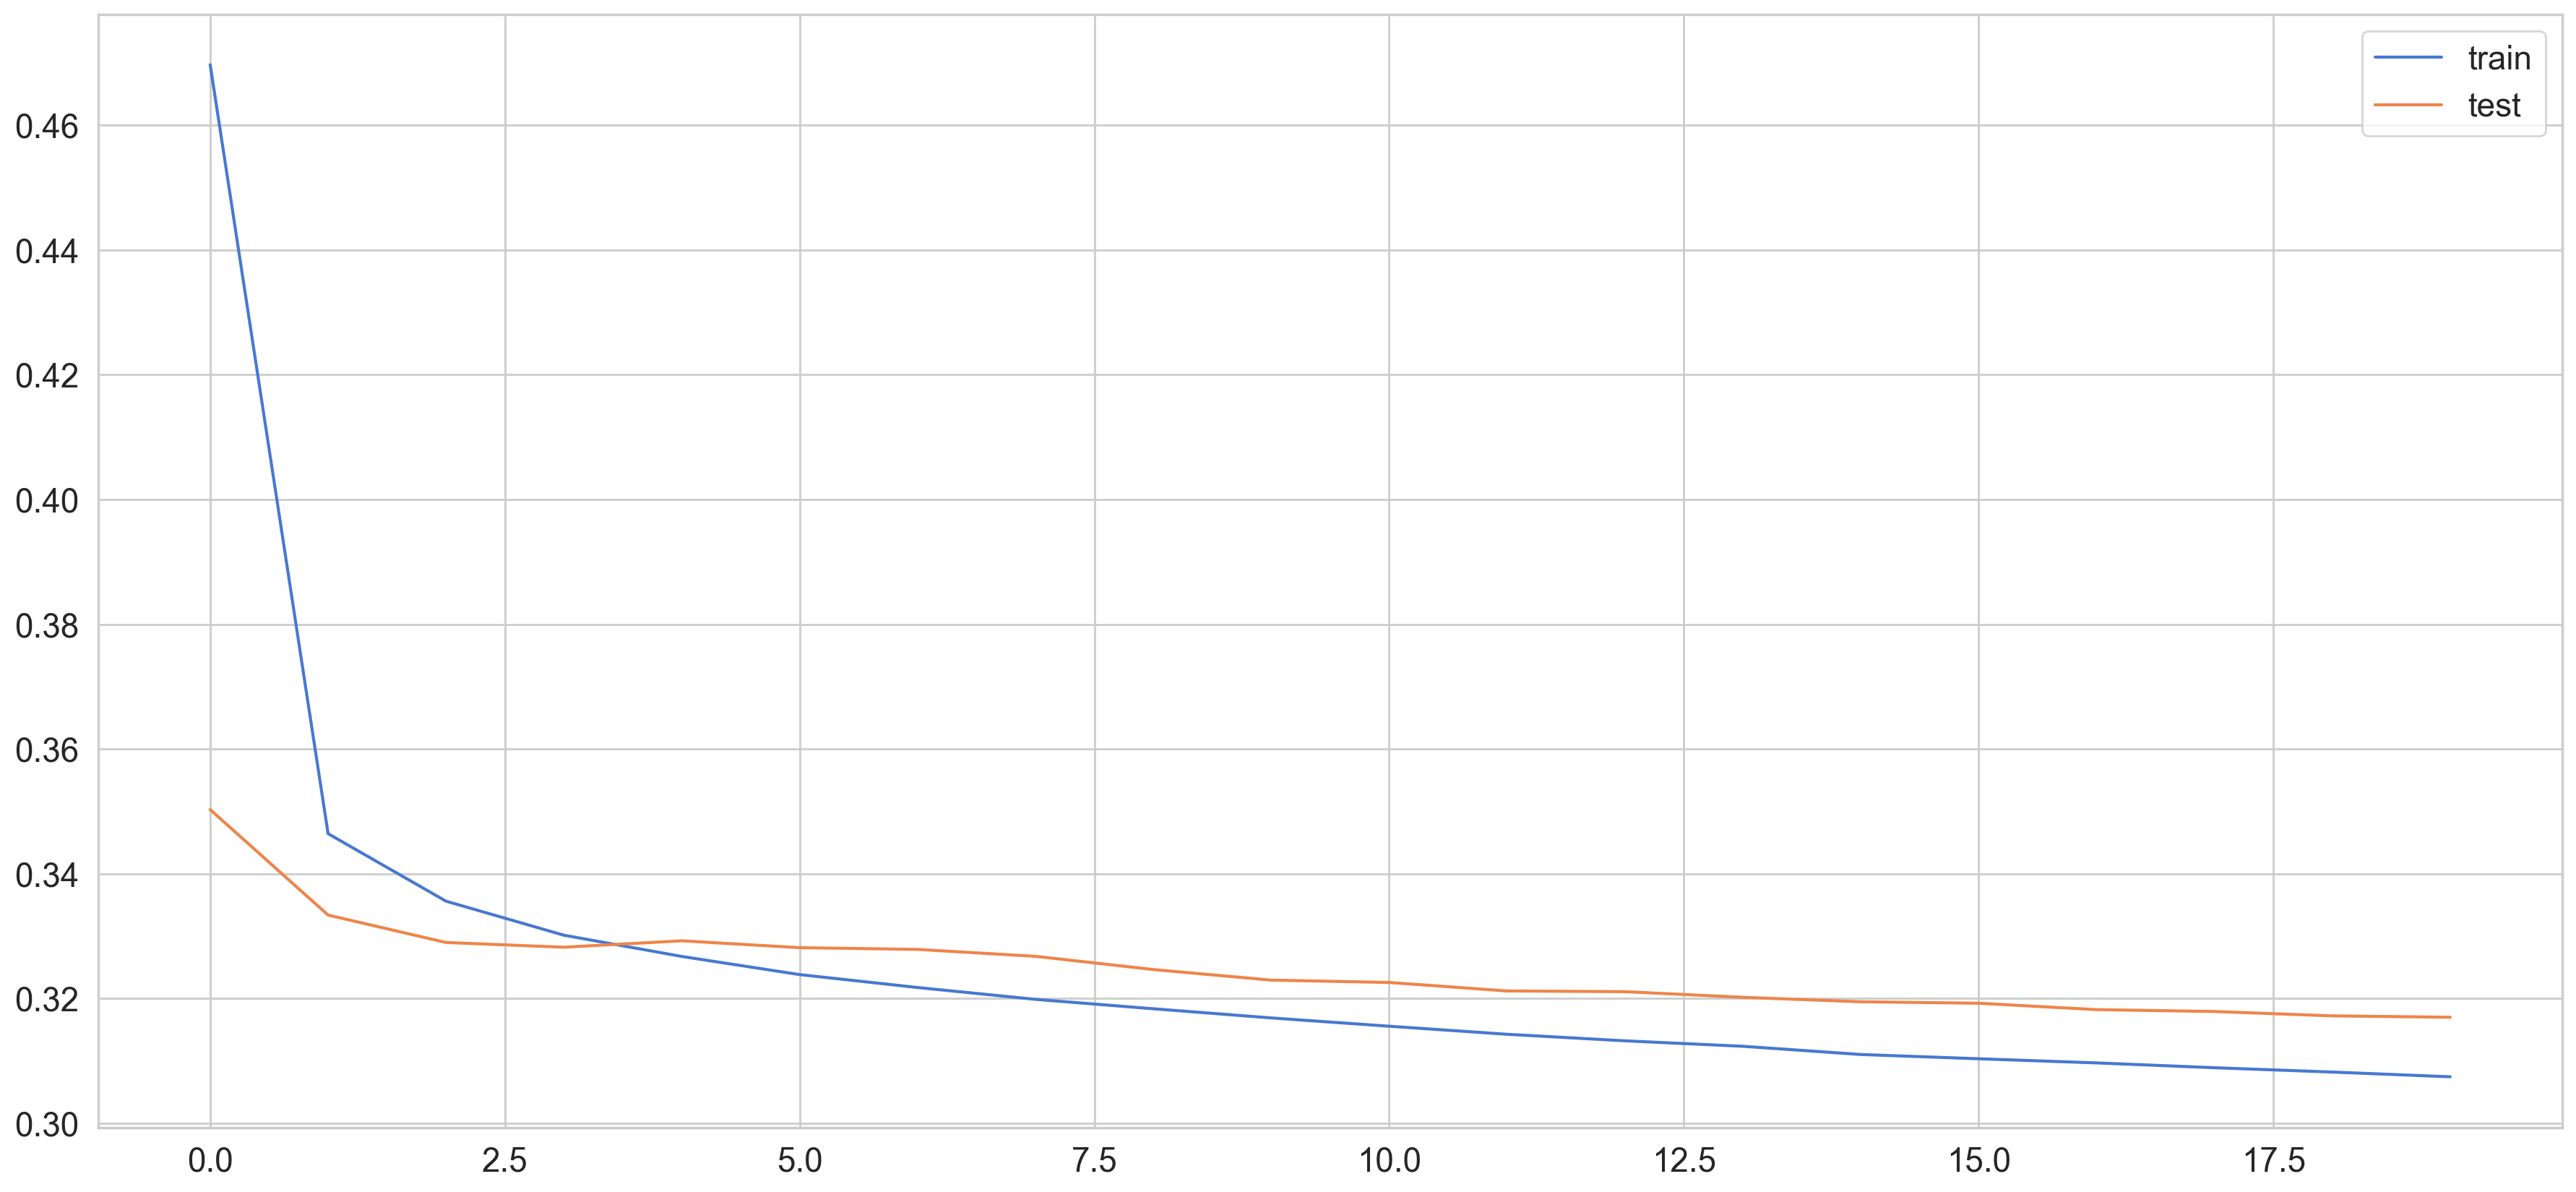

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [24]:
test_loss, test_acc = model.evaluate(test_features,test_labels_encoded,verbose=2)

258/258 - 0s - 728us/step - accuracy: 0.8764 - loss: 0.3167


In [25]:
predictions = model.predict(test_features)

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


In [26]:
predicts = pd.DataFrame(predictions)

In [27]:
predicts.columns = ['Clasical','Reggaeton','Rock']
predict = []
for pred in predictions:
    predict.append(np.argmax(pred))

predicts['Label'] = predict

In [28]:
predicts['Real'] = list(test_labels_encoded.copy())

In [29]:
pd.set_option('display.max_columns', None)
print(predicts)

      Clasical     Reggaeton      Rock  Label  Real
0     0.000080  9.792245e-01  0.020695      1     1
1     0.132729  1.859613e-02  0.848675      2     2
2     0.548268  1.589032e-03  0.450143      0     0
3     0.122168  2.782433e-03  0.875049      2     0
4     0.998938  3.704243e-07  0.001062      0     0
...        ...           ...       ...    ...   ...
8232  0.001514  8.639230e-01  0.134563      1     2
8233  0.000338  9.605798e-01  0.039083      1     1
8234  0.002922  8.836137e-02  0.908716      2     2
8235  0.123283  1.257558e-02  0.864141      2     2
8236  0.000422  9.474092e-01  0.052169      1     1

[8237 rows x 5 columns]


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(list(test_labels_encoded.copy()),predict)

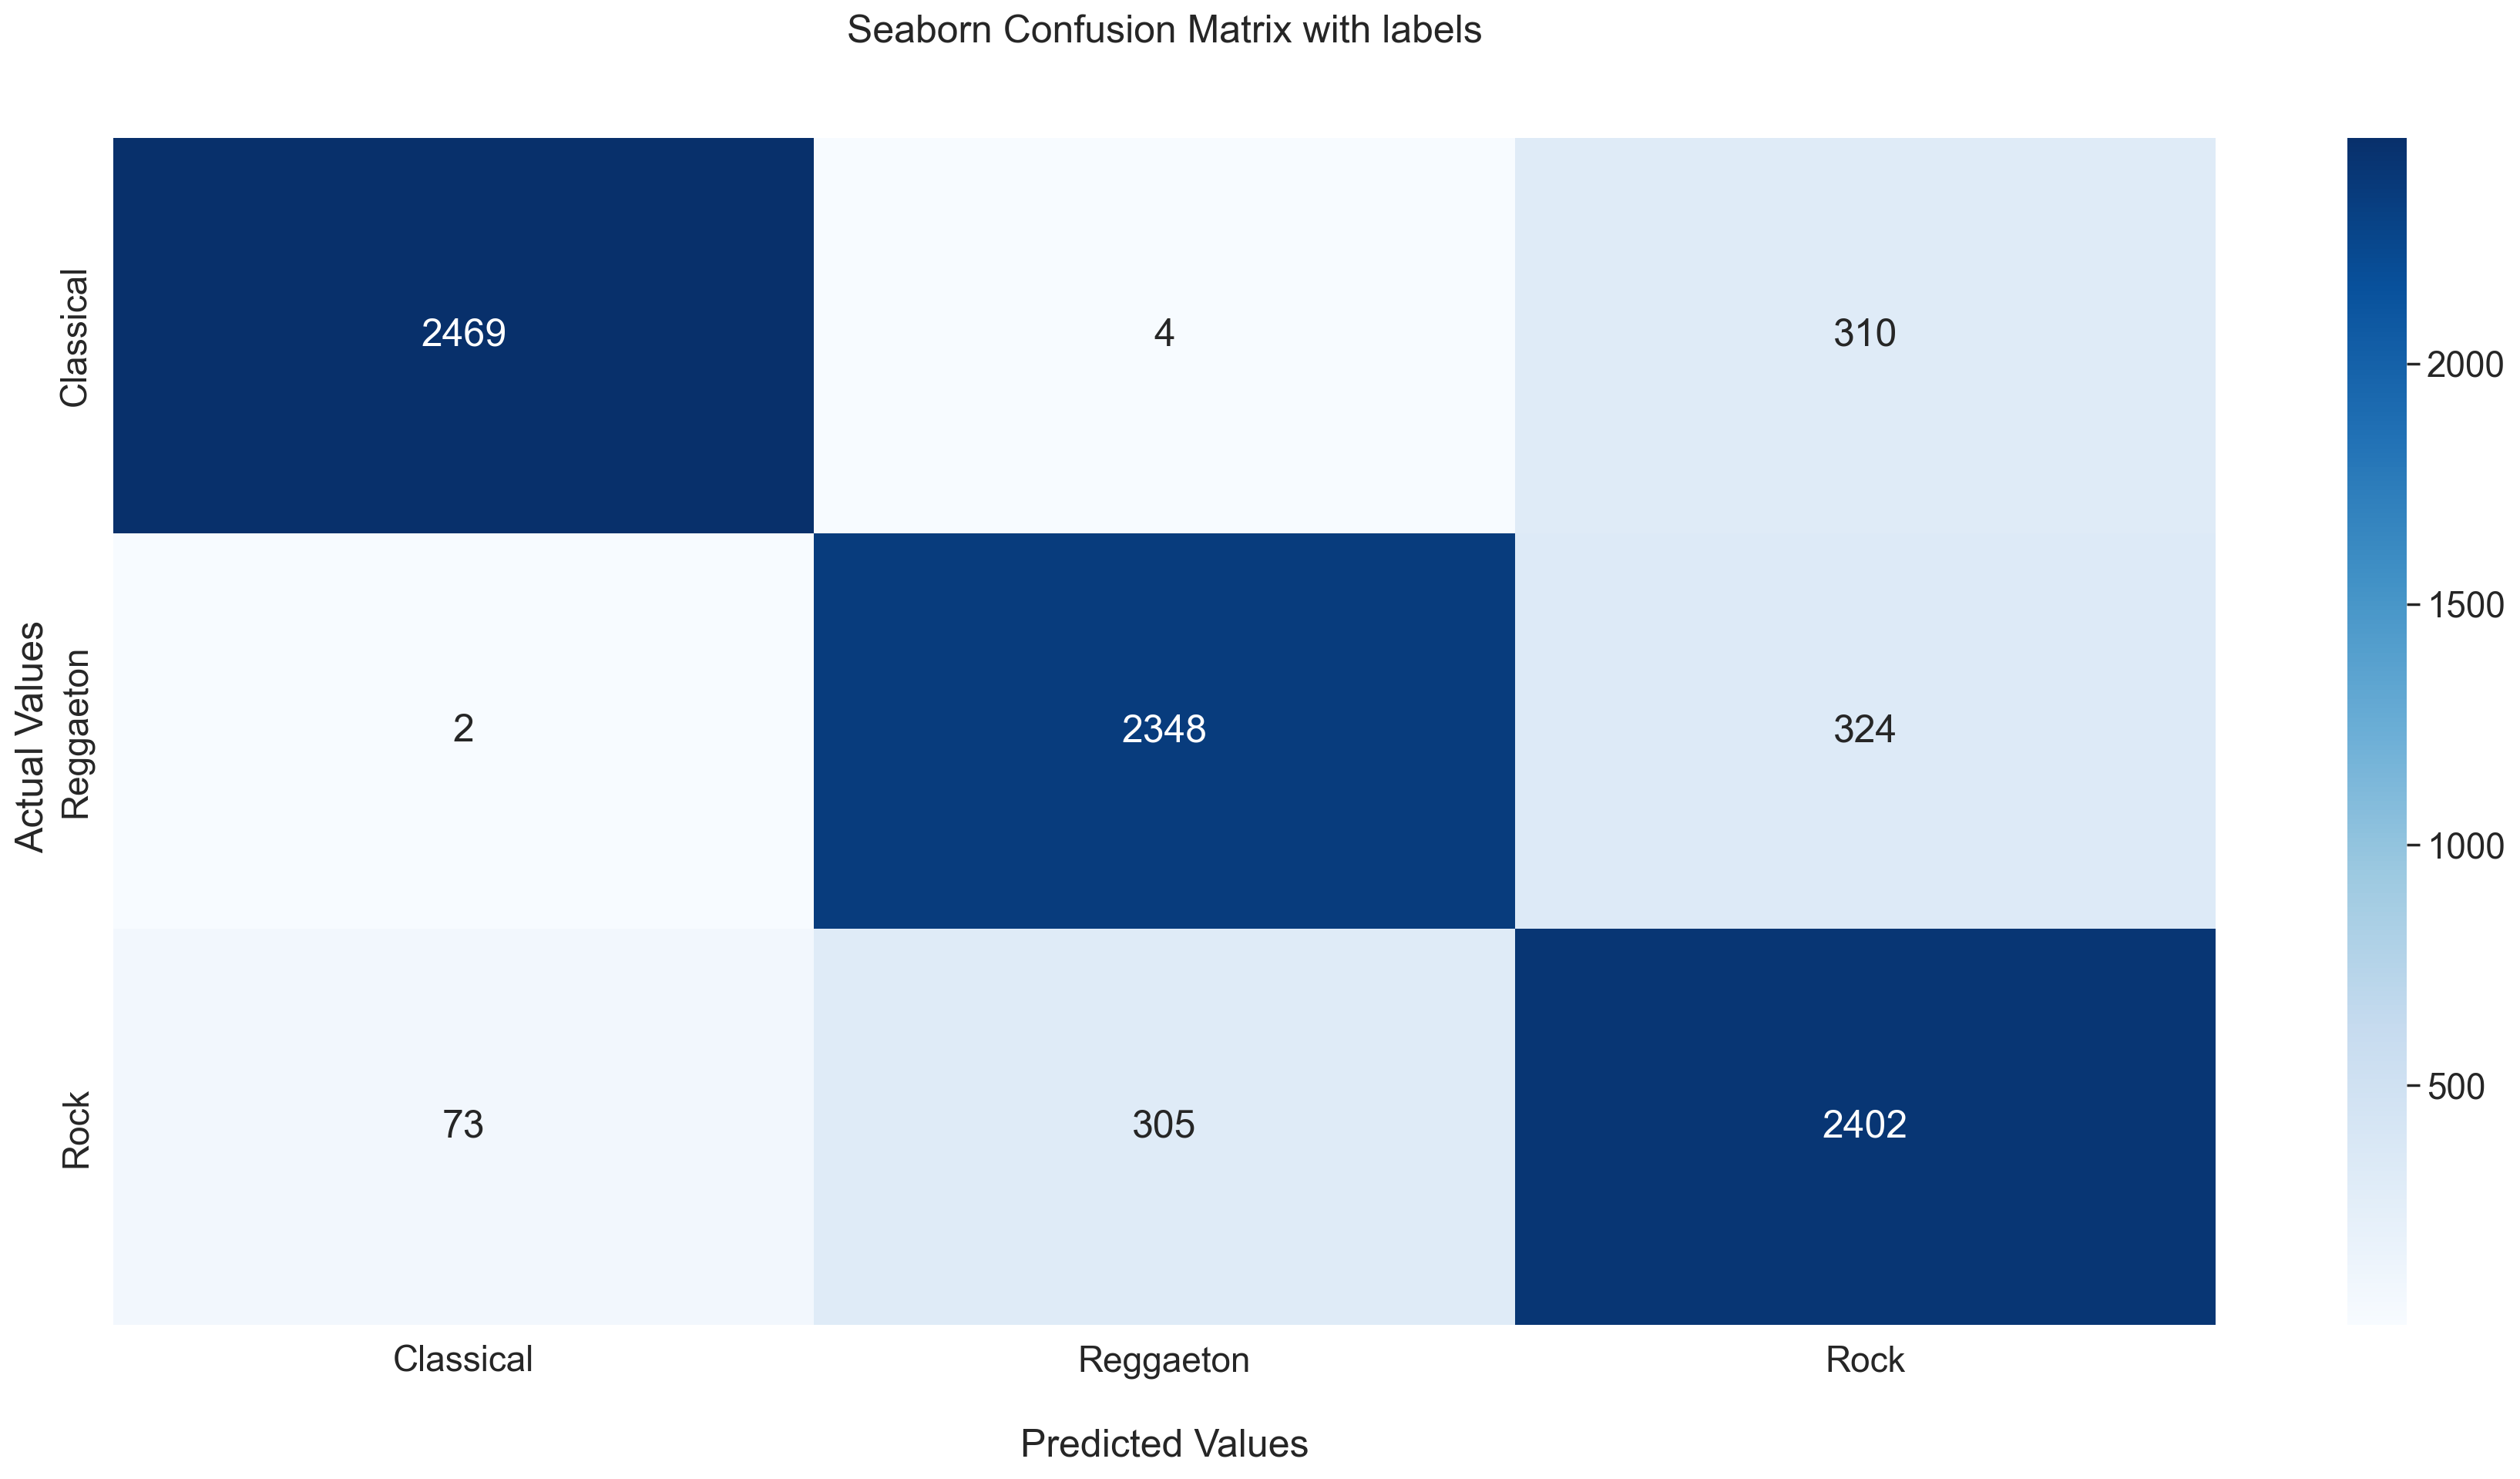

In [31]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Classical','Reggaeton','Rock'])
ax.yaxis.set_ticklabels(['Classical','Reggaeton','Rock'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
%pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/b7/f9/9ad1e6e33e4ae149aead1ee8062e536d060b50d650df710899805562910a/streamlit-1.33.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for click<9,>=7.0 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
%%writefile app.py

Writing app.py


In [33]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pickle
with open('music_genre_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

In [38]:
model.save("music_genre_classifier.h5")